# Topics - Easy Topic Modeling in Python

This notebook introduces a workflow using the text mining technique **Topic Modeling**. The Python library [**gensim**](http://radimrehurek.com/gensim/), an open-source vector space modeling and topic modeling toolkit, offers one reliable way to compute the abstract topics of a collection of documents using [LDA](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation), a generative statistical model. 

"Topic models are algorithms for discovering the main themes that pervade a large and otherwise unstructured collection of documents. Topic models can organize the collection according to the discovered themes." ([Blei 2012: 77](https://www.cs.princeton.edu/~blei/papers/Blei2012.pdf))

Some parts of the following code is heavily inspired by the [gensim tutorial](https://radimrehurek.com/gensim/tutorial.html).

### 1. Prearrangement

First of all you have to import **topics.py** into your Jupyter notebook, which contains the actual magic: several functions from reading and preparing a collection of documents, creating a model to finally visualizing it.

As a first step, simply run the following statement. The first line imports topics.py, the second line makes sure that graphs (created by matplotlib) will be displayed within your Jupyter notebook.

In [1]:
import topics as tp

%matplotlib inline

To work efficiently with this notebook you should have installed three packages separately, namely **[numpy](http://www.numpy.org)**, **[matplotlib](http://matplotlib.org)** and **[gensim](http://radimrehurek.com/gensim/)**. If you are not sure whether everything is installed correctly or not, use the following statement:

In [ ]:
tp.testing()

In case you get

`1.11.0`

`1.5.1`

`0.12.4`

everything works out just fine. The output stands for the version of numpy, matplotlib and gensim in this order.

### 2. Reading documents 

Let's start reading text files from a folder. The folder **corpus** within **Topics** contains a collection of short stories saved as [plain text](https://en.wikipedi.org/wiki/Plain_text). In case you have your own collection, feel free to set the variable `folder` to the respective path, e. g. `folder = '/users/mycollection/*.txt'`. Be aware of forgetting "`/*.txt`" at the end!

**Note**: Every file has to be saved as plain text.

In [2]:
folder = './corpus/*.txt'

To use the first function `tp.readCorpus`, which is reading and saving the content of every single document in a [list](https://docs.python.org/3/tutorial/datastructures.html), run the following statement:

In [3]:
documents = tp.readCorpus(folder)

Storing the file names as document labels in a separate list:

In [4]:
doc_labels = tp.docLabels(folder)
doc_labels

['Doyle_AScandalinBohemia',
 'Doyle_AStudyinScarlet',
 'Doyle_TheHoundoftheBaskervilles',
 'Doyle_TheSignoftheFour',
 'Howard_GodsoftheNorth',
 'Howard_SchadowsinZamboula',
 'Howard_ShadowsintheMoonlight',
 'Howard_TheDevilinIron',
 'Kipling_TheEndofthePassage',
 'Kipling_TheJungleBook',
 'Kipling_ThyServantaDog',
 'Lovecraft_AttheMountainofMadness',
 'Lovecraft_TheShunnedHouse',
 'Poe_EurekaAProsePoem',
 'Poe_TheCaskofAmontillado',
 'Poe_TheMasqueoftheRedDeath',
 'Poe_ThePurloinedLetter']

**Hint**: If you are interested in a single function, try using `help()` as in the following block demonstrated.

In [5]:
help(tp.docLabels)

Help on function docLabels in module topics:

docLabels(path)
    Create a list of names (of the files) using paths and return a
    list.
    
    Args:
        path (str): Path/glob pattern of the text files to process.
    
    Author:
        DARIAH-DE



### 3. Preprocessing

To compute a reliable result, you have to preprocess the documents before creating a model. 

Tokenization, also called word segmentation, is the process of finding word boundaries - in its simplest form, by using the blanks in-between words as delimiters. This is exactly what you do now using `tp.tokenize`.

In [6]:
texts = tp.tokenize(documents)

Removing hapax legomena. A hapax legomenon is a single word that occurs only once in a text.

In [7]:
texts = tp.removeHapaxLeg(texts)

Removing stopwords. Stopwords might occure a thousand times in one document but will not be considered because of its semantic unimportance. Feel free to have a look at the stopwords lists in the folder **stopwords** within **helpful_stuff**.

Before removing stopwords, make sure the parameter `stoplist` is set correctly to either 'en', 'de', 'es' or 'fr'.

In [8]:
texts = tp.removeStopWords(texts, stoplist = 'en')

### 4. Model creation

Suspense builds: you can finally create the model using gensim functions. For more details have a look at the comments (marked with a #) in the code. If you are wondering: yes, this may take a while.

In [9]:
from gensim import corpora, models
# Specify number of topics
no_of_topics = 10
# Generate dictionary object
dictionary = corpora.Dictionary(texts)
# Generate corpus object
corpus = [dictionary.doc2bow(text) for text in texts]
# Generate model object
model = models.LdaModel(corpus,
    id2word = dictionary,
    num_topics = no_of_topics,
    passes = 10
    )

With `tp.topicLabels` you will create topic labels using the previously created model.

In [10]:
topic_labels = tp.topicLabels(model, no_of_topics)

Let's see what you have done: the generated topics will be printed out with the following statement.

In [11]:
model.show_topics(num_topics = 5)

[(1,
  '0.040*s + 0.025*great + 0.021*like + 0.018*old + 0.018*did + 0.014*saw + 0.013*time + 0.013*long + 0.012*things + 0.011*left'),
 (3,
  '0.055*s + 0.026*man + 0.021*like + 0.019*eyes + 0.019*said + 0.015*head + 0.014*did + 0.014*door + 0.014*t + 0.013*black'),
 (0,
  '0.032*said + 0.029*s + 0.025*man + 0.015*holmes + 0.014*little + 0.012*way + 0.012*t + 0.012*time + 0.010*came + 0.010*come'),
 (5,
  '0.115*said + 0.033*s + 0.024*like + 0.022*came + 0.021*did + 0.018*t + 0.018*man + 0.017*went + 0.016*come + 0.015*time'),
 (4,
  '0.028*holmes + 0.019*man + 0.018*s + 0.015*said + 0.013*know + 0.012*watson + 0.010*think + 0.009*house + 0.009*night + 0.008*face')]

To save the gensim output in the folder **out** within **Topics**, but this is not necessary to visualize the model:

In [12]:
tp.saveGensimModel(model, corpus, dictionary, no_of_topics, doc_labels)

saving ...



### 5. The document-topic matrix

As one of the last steps you will create a doc-topic matrix from the gensim objects. In its basics the doc-topic matrix describes the frequency of topics that occur in your collection of documents. 

In [13]:
doc_topic = tp.gensim_to_dtm(model, corpus, no_of_topics)

### 6. Document-topic heatmap

`tp.docTopHeatmap` finally visualizes the model and shows a [heatmap](https://en.wikipedia.org/wiki/Heat_map).

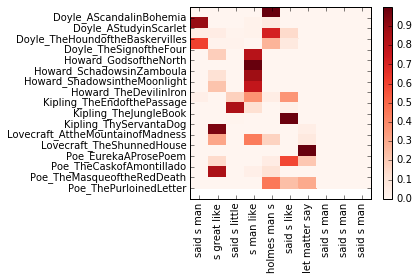

In [14]:
tp.docTopHeatmap(doc_topic, doc_labels, topic_labels)